In [1]:
import requests, zipfile, io
with zipfile.ZipFile("/content/drive/MyDrive/rnd.zip","r") as zip_ref:
    zip_ref.extractall("bitbrain")

In [2]:
!pip install chart_studio

     |████████████████████████████████| 71kB 6.8MB/s 


In [3]:
import os
import glob
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
py.sign_in(username='jd561996', api_key='NAaKPCM0BgyS5nQjMWqi')
import requests, zipfile, io

In [4]:
df1 = pd.concat([pd.read_csv(file,sep=';\t',engine='python').assign(VM=os.path.basename(file).split('.')[0]) for file in glob.glob('/content/bitbrain/2013-7/*.csv')], ignore_index=True)

df2= pd.concat([pd.read_csv(file,sep=';\t',engine='python',).assign(VM=os.path.basename(file).split('.')[0]) for file in glob.glob('/content/bitbrain/2013-8/*.csv')], ignore_index=True)
df3= pd.concat([pd.read_csv(file,sep=';\t',engine='python').assign(VM=os.path.basename(file).split('.')[0]) for file in glob.glob('/content/bitbrain/2013-9/*.csv')], ignore_index=True)



newdat = df1.append(df2)
newerdat = newdat.append(df3)
df = newerdat

In [5]:
df.shape

(12496728, 12)

In [6]:
df['Timestamp']=pd.to_datetime(df['Timestamp [ms]'],unit='s')
df.set_index('Timestamp',inplace=True)

In [7]:
df=df.dropna()


In [8]:
df2 = df.resample('H').mean()
df2.isnull().sum()
df2.shape

(2184, 11)

In [9]:
df2

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
Timestamp,,,,,,,,,,,
2013-06-30 22:00:00,1.372631e+09,2.752941,7474.545344,328.827777,3.798474,9.551349e+06,363858.312934,137.840189,82.222717,35.919792,67.130892
2013-06-30 23:00:00,1.372635e+09,2.752941,7474.545341,356.376365,4.176938,9.551401e+06,354064.129946,178.901434,117.114080,47.538231,80.069106
2013-07-01 00:00:00,1.372639e+09,2.752941,7474.545338,337.242291,3.901431,9.551433e+06,341599.059046,189.610372,220.076727,54.814559,93.988582
2013-07-01 01:00:00,1.372642e+09,2.752941,7474.545340,323.490043,3.832667,9.551525e+06,338077.103111,319.383570,184.373525,43.521722,95.448147
2013-07-01 02:00:00,1.372646e+09,2.752941,7474.545342,339.600603,4.024352,9.551687e+06,349554.626393,277.077257,217.302736,38.045880,68.081877
...,...,...,...,...,...,...,...,...,...,...,...
2013-09-29 17:00:00,1.380476e+09,2.144161,5815.660194,216.036210,2.587369,6.281650e+06,235186.390052,89.147705,71.798250,44.191502,34.136553
2013-09-29 18:00:00,1.380479e+09,2.144161,5815.660194,217.214133,2.607006,6.281953e+06,234831.376169,44.449536,56.125042,90.351943,51.504197
2013-09-29 19:00:00,1.380483e+09,2.144161,5815.660194,217.425641,2.604474,6.285949e+06,232609.193467,120.688159,58.136871,67.257971,44.561959


In [10]:
df2=df2.dropna()

In [11]:
df2.isnull().sum()

Timestamp [ms]                           0
CPU cores                                0
CPU capacity provisioned [MHZ]           0
CPU usage [MHZ]                          0
CPU usage [%]                            0
Memory capacity provisioned [KB]         0
Memory usage [KB]                        0
Disk read throughput [KB/s]              0
Disk write throughput [KB/s]             0
Network received throughput [KB/s]       0
Network transmitted throughput [KB/s]    0
dtype: int64

In [12]:

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout

In [13]:
data=df2['CPU usage [MHZ]'].values
data.shape

(2136,)

In [14]:
data=data.astype('float32')

In [15]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
test = data[train_size:len(data),]
train=data[0:train_size,]
test.shape

(534,)

In [16]:

train=train.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
train = scaler.fit_transform(train)

In [25]:

test=test.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
test = scaler.fit_transform(test)
test.shape

(534, 1)

In [26]:
train.dtype

dtype('float32')

In [27]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)
    

In [29]:
n_features=10
x_train,y_train=to_sequences(train,n_features)
x_test,y_test=to_sequences(test,n_features)
test.shape

(534, 1)

In [30]:

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

Shape of training set: (1591, 10)
Shape of test set: (523, 10)


In [31]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [32]:

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))

Shape of training set: (1591, 1, 10)
Shape of test set: (523, 1, 10)


In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [34]:
model = Sequential()

model.add(LSTM(units = 60,input_shape = (None,n_features)))
model.add(Dense(units = 1))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60)                17040     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 17,101
Trainable params: 17,101
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam', loss = 'mean_squared_error',metrics=['acc'])
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=100,verbose=2)

Epoch 1/100
50/50 - 3s - loss: 0.0573 - acc: 6.2854e-04 - val_loss: 0.0339 - val_acc: 0.0019
Epoch 2/100
50/50 - 0s - loss: 0.0293 - acc: 0.0013 - val_loss: 0.0267 - val_acc: 0.0019
Epoch 3/100
50/50 - 0s - loss: 0.0228 - acc: 0.0013 - val_loss: 0.0211 - val_acc: 0.0019
Epoch 4/100
50/50 - 0s - loss: 0.0186 - acc: 0.0013 - val_loss: 0.0181 - val_acc: 0.0019
Epoch 5/100
50/50 - 0s - loss: 0.0163 - acc: 0.0013 - val_loss: 0.0165 - val_acc: 0.0019
Epoch 6/100
50/50 - 0s - loss: 0.0151 - acc: 0.0013 - val_loss: 0.0152 - val_acc: 0.0019
Epoch 7/100
50/50 - 0s - loss: 0.0143 - acc: 0.0013 - val_loss: 0.0145 - val_acc: 0.0019
Epoch 8/100
50/50 - 0s - loss: 0.0136 - acc: 0.0013 - val_loss: 0.0139 - val_acc: 0.0019
Epoch 9/100
50/50 - 0s - loss: 0.0131 - acc: 0.0013 - val_loss: 0.0138 - val_acc: 0.0019
Epoch 10/100
50/50 - 0s - loss: 0.0127 - acc: 0.0013 - val_loss: 0.0132 - val_acc: 0.0019
Epoch 11/100
50/50 - 0s - loss: 0.0125 - acc: 0.0013 - val_loss: 0.0133 - val_acc: 0.0019
Epoch 12/100
50

In [38]:
train_predict=model.predict(x_train)


In [40]:
test_predict=model.predict(x_test)


In [41]:
test_predict.dtype

dtype('float32')

In [42]:
train_predict=train_predict.reshape(train_predict.shape[0],1)


In [43]:
test_predict=test_predict.reshape(test_predict.shape[0],1)

In [44]:
train_predict = scaler.inverse_transform(train_predict)


In [45]:
y_train1 = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test1 = scaler.inverse_transform([y_test])

In [46]:
test_predict.shape

(523, 1)

In [47]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train1[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(y_test1[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 157.34 RMSE
Test Score: 167.51 RMSE


In [48]:
y_test1=y_test1.reshape(y_test1.shape[1])
data1=pd.DataFrame(y_test1,columns=['test_data'])
data2=pd.DataFrame(test_predict,columns=['predict_data'])


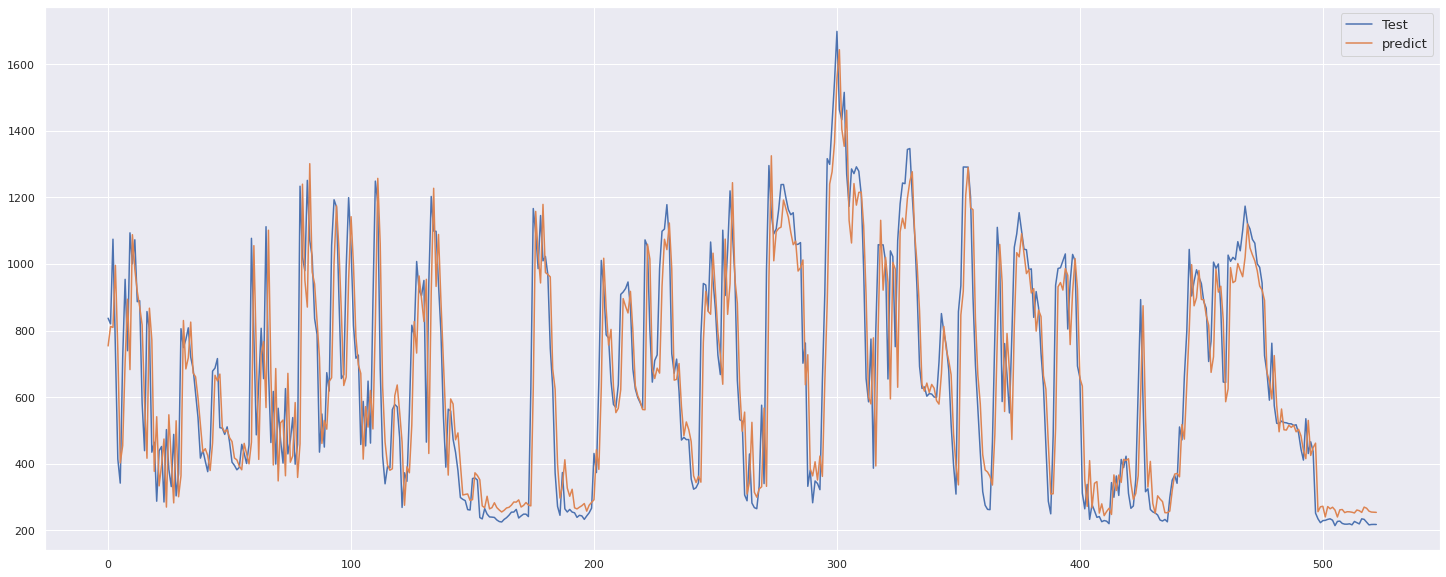

In [49]:
sns.set()
plt.figure(figsize=(25,10))
plt.plot(data1.index,data1, label='Test')
plt.plot(data2.index,data2, label='predict')
plt.legend(loc='best',fontsize=13)
plt.show()

In [50]:
model1 = Sequential()

model1.add(LSTM(units = 80,input_shape = (None,n_features),activation='relu', return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=80, activation='relu'  ))
model1.add(Dropout(0.3))
model1.add(Dense(units = 1))

In [51]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 80)          29120     
_________________________________________________________________
dropout (Dropout)            (None, None, 80)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                51520     
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 80,721
Trainable params: 80,721
Non-trainable params: 0
_________________________________________________________________


In [53]:
model1.compile(optimizer='adam', loss = 'mean_squared_error',metrics=['acc'])
model1.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=200,verbose=2)

Epoch 1/200
50/50 - 3s - loss: 0.1006 - acc: 6.2854e-04 - val_loss: 0.0392 - val_acc: 0.0019
Epoch 2/200
50/50 - 0s - loss: 0.0360 - acc: 0.0013 - val_loss: 0.0262 - val_acc: 0.0019
Epoch 3/200
50/50 - 0s - loss: 0.0247 - acc: 0.0013 - val_loss: 0.0192 - val_acc: 0.0019
Epoch 4/200
50/50 - 0s - loss: 0.0200 - acc: 0.0013 - val_loss: 0.0165 - val_acc: 0.0019
Epoch 5/200
50/50 - 0s - loss: 0.0189 - acc: 0.0013 - val_loss: 0.0150 - val_acc: 0.0019
Epoch 6/200
50/50 - 0s - loss: 0.0174 - acc: 0.0013 - val_loss: 0.0142 - val_acc: 0.0019
Epoch 7/200
50/50 - 0s - loss: 0.0161 - acc: 0.0013 - val_loss: 0.0137 - val_acc: 0.0019
Epoch 8/200
50/50 - 0s - loss: 0.0154 - acc: 0.0013 - val_loss: 0.0133 - val_acc: 0.0019
Epoch 9/200
50/50 - 0s - loss: 0.0156 - acc: 0.0013 - val_loss: 0.0130 - val_acc: 0.0019
Epoch 10/200
50/50 - 0s - loss: 0.0151 - acc: 0.0013 - val_loss: 0.0128 - val_acc: 0.0019
Epoch 11/200
50/50 - 0s - loss: 0.0154 - acc: 0.0013 - val_loss: 0.0133 - val_acc: 0.0019
Epoch 12/200
50

In [54]:
train_predict=model1.predict(x_train)
test_predict=model1.predict(x_test)
train_predict=train_predict.reshape(train_predict.shape[0],1)
test_predict=test_predict.reshape(test_predict.shape[0],1)
train_predict = scaler.inverse_transform(train_predict)
y_train2 = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test2 = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train2[0], train_predict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(y_test2[0], test_predict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 141.09 RMSE
Test Score: 176.18 RMSE


In [55]:
y_test2=y_test2.reshape(y_test2.shape[1])
data1=pd.DataFrame(y_test2,columns=['test_data'])
data2=pd.DataFrame(test_predict,columns=['predict_data'])


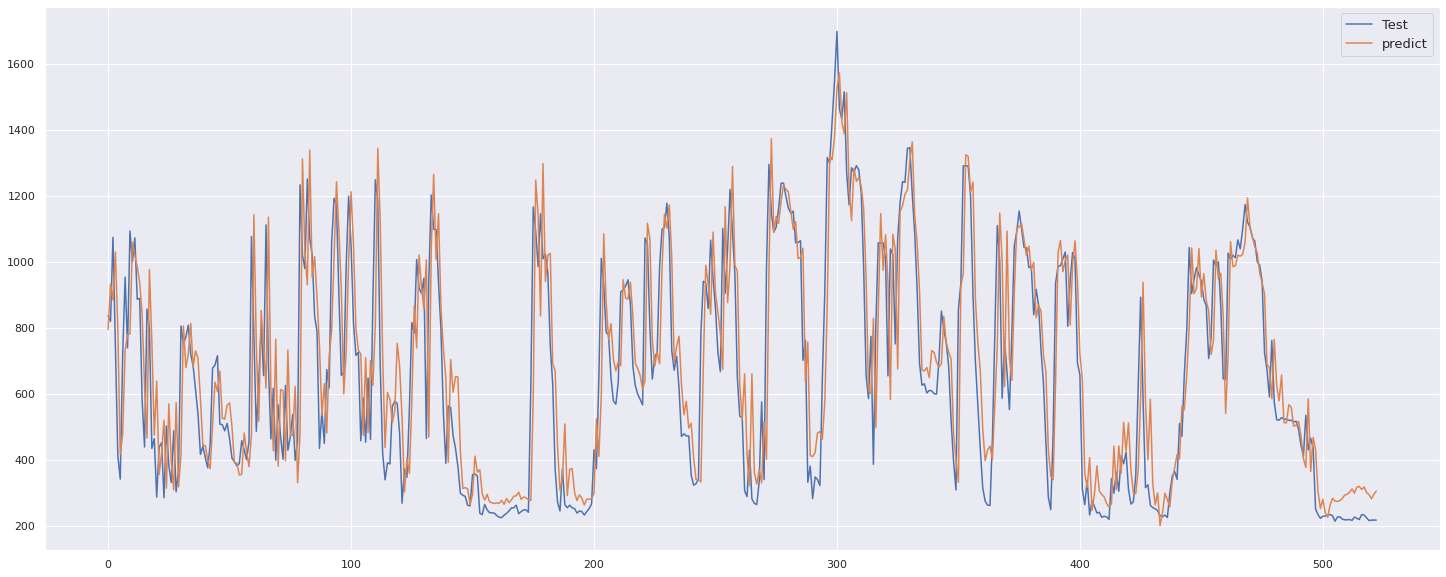

In [56]:
import seaborn as sns

sns.set()
plt.figure(figsize=(25,10))
plt.plot(data1.index,data1, label='Test')
plt.plot(data2.index,data2, label='predict')
plt.legend(loc='best',fontsize=13)
plt.show()